In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [28]:
# https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope


In [29]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data", names=cols)
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [30]:
df["class"]=(df["class"]=="g").astype(int)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


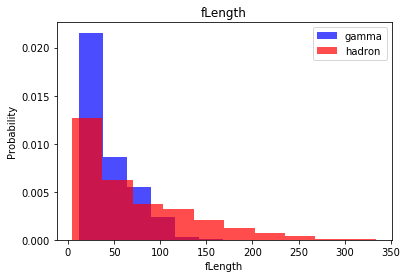

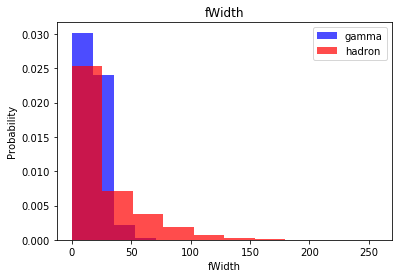

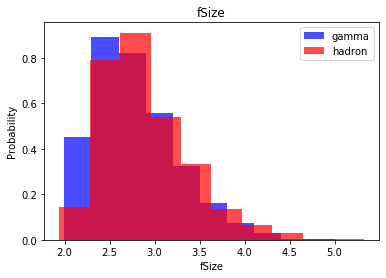

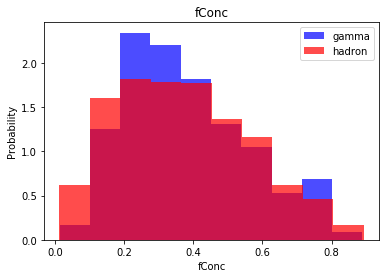

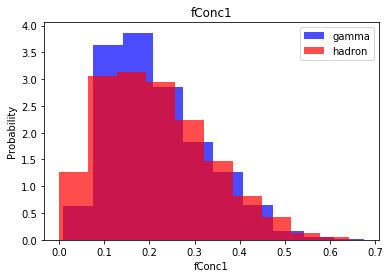

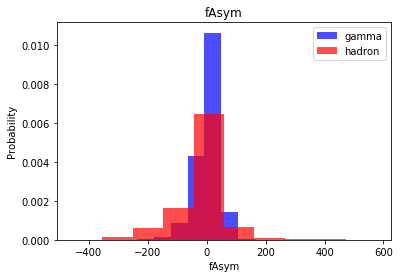

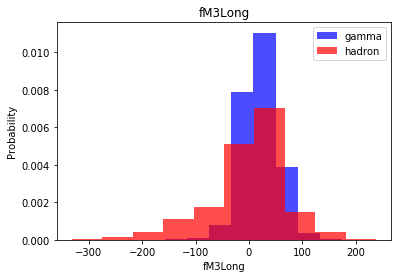

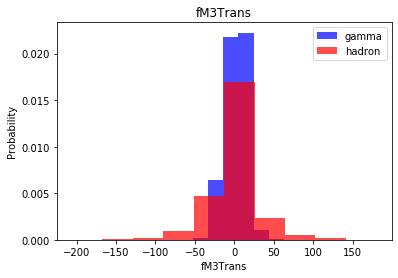

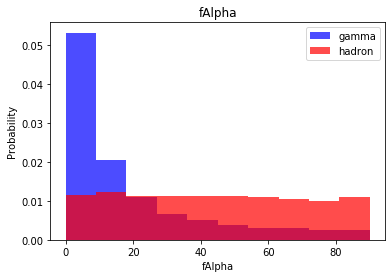

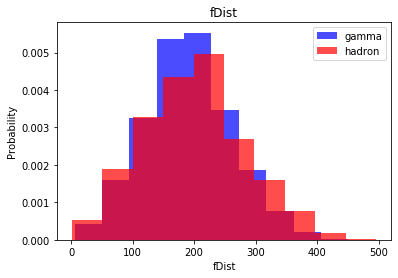

In [31]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma',alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color='red', label='hadron',alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [32]:
#train, validation, test datasets


In [33]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [37]:
def scale_dataset(dataframe):
    x = dataframe[dataframe.cols[:-1]].values
    y = dataframe[dataframe.cols[-1]].values

    scaler=StandardScaler()
    X= scaler.fit_transform(X)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [38]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
17909,36.8545,8.8556,2.4355,0.4997,0.2792,-11.9309,-15.9908,14.7398,45.3487,162.3352,0
1880,23.1655,20.9149,2.6590,0.4079,0.2292,16.1363,17.7383,14.8946,24.7031,156.6860,1
17903,16.0737,7.1383,2.3675,0.3923,0.2199,-2.0537,18.7109,-7.4791,22.4550,138.4910,0
5853,118.7470,37.2663,3.8326,0.1126,0.0595,122.5160,90.1485,9.1215,3.2776,211.7370,1
5050,19.8549,16.1493,2.5441,0.4771,0.2843,17.9082,16.4779,3.4476,20.7110,154.2330,1
...,...,...,...,...,...,...,...,...,...,...,...
9004,61.5175,26.4775,3.3753,0.1572,0.0845,3.5699,40.0819,-15.5083,3.0791,211.0470,1
15443,73.4303,29.8695,2.9198,0.2441,0.1162,-29.7888,-73.9524,21.9689,6.0497,190.8169,0
3805,16.9293,11.3560,2.4249,0.5752,0.3101,-0.4147,4.1460,-4.7930,49.2234,198.6890,1
18768,101.3080,67.1717,3.1845,0.2243,0.1285,-48.9360,-122.3310,55.0747,48.3290,106.2050,0


In [42]:
print(len(train[train["class"]==1])) #gamma 
print(len(train[train["class"]==0])) 

7453
3959
